**マクロデータの分析（Pythonによる実装）**

配布資料「マクロデータを用いた実証分析」を参照


In [1]:
# データを読み込むためのライブラリをインポート
import pandas as pd
# 演算処理のためのライブラリをインポート
import numpy as np
# グラフ描画のためのライブラリをインポート
import matplotlib.pyplot as plt

In [ ]:
# データを読み込む
df=pd.read_excel('http://www.aoyama.ac.jp/~nakagawa/GDPData1.xlsx',sheet_name=0)
# データの先頭の4行を表示
df.head(4)

年次    名目GDP  実質GDP（1985年価格）  \
0  （Data source: International Financial Statistics)   単位：十億円             NaN   
1                                               1956   9422.2         51402.5   
2                                               1957  10858.3         55303.7   
3                                               1958  11538.3         59033.5   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  
0         NaN         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN         NaN

In [3]:
# データ系列だけ摘出（データの入っていない列は不要）
df = df.iloc[:, :3]
# データでがない行を削除
df = df.dropna(axis=0)
df.head()

年次    名目GDP  実質GDP（1985年価格）
1  1956   9422.2         51402.5
2  1957  10858.3         55303.7
3  1958  11538.3         59033.5
4  1959  13190.3         64435.3
5  1960  16009.7         72838.0

In [5]:
# Convert '年次' column to datetime
df['年次'] = pd.to_datetime(df['年次'], format='%Y')
# Set '年次' as index
df.set_index('年次', inplace=True)


**名目ＧＤＰと実質ＧＤＰ**

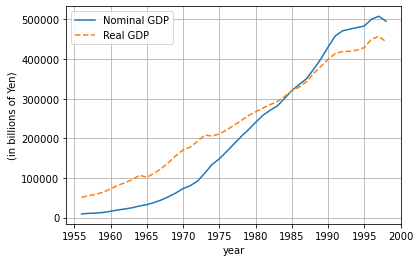

In [ ]:
# 名目ＧＤＰと実質ＧＤＰの推移グラフを作成
plt.plot(df.index, df['名目GDP'], linestyle='solid', label='Nominal GDP')
plt.plot(df.index, df['実質GDP（1985年価格）'], linestyle='dashed', label='Real GDP')
plt.ylabel('(in billions of Yen)')
plt.xlabel('year')
plt.legend()
plt.grid(True)
plt.show()

**経済成長率（名目・実質ＧＤＰ成長率）**

In [ ]:
# 名目・実質GDP成長率（変化率）の系列を作成
df['名目GDP成長率']=(df['名目GDP'].shift(-1)-df['名目GDP'])/df['名目GDP']
df['実質GDP成長率']=(df['実質GDP（1985年価格）'].shift(-1)-df['実質GDP（1985年価格）'])/df['実質GDP（1985年価格）']
df.head()

名目GDP  実質GDP（1985年価格）  名目GDP成長率  実質GDP成長率
年次                                                     
1956-01-01   9422.2         51402.5  0.152417  0.075895
1957-01-01  10858.3         55303.7  0.062625  0.067442
1958-01-01  11538.3         59033.5  0.143175  0.091504
1959-01-01  13190.3         64435.3  0.213748  0.130405
1960-01-01  16009.7         72838.0  0.207799  0.117128

In [8]:
df.tail()

名目GDP  実質GDP（1985年価格）  名目GDP成長率  実質GDP成長率
年次                                                    
1994-01-01  479260        422495.2  0.008263  0.014713
1995-01-01  483220        428711.5  0.035367  0.050500
1996-01-01  500310        450361.4  0.015075  0.014279
1997-01-01  507852        456792.1 -0.024891 -0.028625
1998-01-01  495211        443716.4       NaN       NaN

In [9]:
# データがない行（NaNの行）を削除
df.dropna(inplace=True)
df.tail()

名目GDP  実質GDP（1985年価格）  名目GDP成長率  実質GDP成長率
年次                                                    
1993-01-01  475381        419794.3   0.00816  0.006434
1994-01-01  479260        422495.2  0.008263  0.014713
1995-01-01  483220        428711.5  0.035367  0.050500
1996-01-01  500310        450361.4  0.015075  0.014279
1997-01-01  507852        456792.1 -0.024891 -0.028625

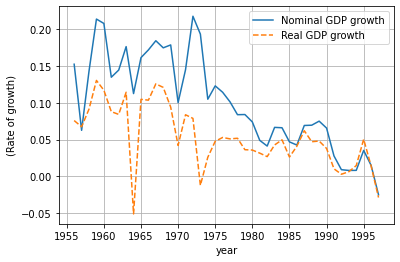

In [10]:
#　名目と実質ＧＤＰ成長率の推移グラフを作成
plt.plot(df.index, df['名目GDP成長率'], linestyle='solid', label='Nominal GDP growth')
plt.plot(df.index, df['実質GDP成長率'], linestyle='dashed', label='Real GDP growth')
plt.ylabel('(Rate of growth)')
plt.xlabel('year')
plt.legend()
plt.grid(True)
plt.show()

**物価上昇率（インフレ率）**

No handles with labels found to put in legend.


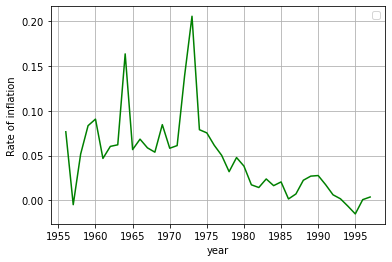

In [11]:
#　インフレ率の算出とグラフ作成
df['Inflation']=df['名目GDP成長率']-df['実質GDP成長率']
plt.plot(df.index, df['Inflation'], linestyle='solid', color='green')
plt.ylabel('Rate of inflation')
plt.xlabel('year')
plt.legend()
plt.grid(True)
plt.show()

ーーー
**以降は貨幣供給量と物価の関係について**

In [ ]:
# データの読み込み
df=pd.read_csv('http://www.aoyama.ac.jp/~nakagawa/M-P-Data.csv',sep=',')
df.drop(columns=['Unnamed: 4','Unnamed: 5'],inplace=True)
df.head()

Year        M2 M2 (in Bil)        CPI
0  1970  4.372847     477,719  30.977824
1  1971  5.267328     575,438  32.958964
2  1972  6.664981     728,127  34.555337
3  1973  8.177558     893,371  38.566736
4  1974  9.151940     999,819  47.522798

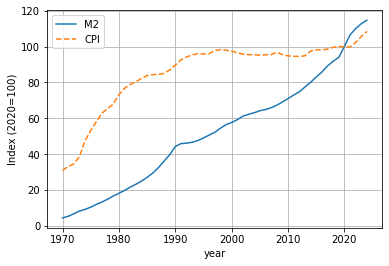

In [3]:
# グラフの作成
# Convert 'Year' column to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
# Set 'Year' as index
df.set_index('Year', inplace=True)

plt.plot(df.index, df['M2'], linestyle='solid',label='M2')
plt.plot(df.index, df['CPI'], linestyle='dashed',label='CPI')
plt.ylabel('Index (2020=100)')
plt.xlabel('year')
plt.legend()
plt.grid(True)
plt.show()